# Clasificación con Árboles de Decisión y Random Forest
## CART (Classification and Regression Trees) y Ensambles

Este notebook demuestra cómo aplicar **Árboles de Decisión** y **Random Forest** para problemas de clasificación.


## 1. Importaciones de Librerías


In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

print("✅ Todas las librerías importadas correctamente")


✅ Todas las librerías importadas correctamente


---

# PARTE 1: ÁRBOLES DE DECISIÓN (Decision Trees)

## 2. Árbol de Decisión Simple - Mowers Dataset


In [22]:
print("\n" + "="*70)
print("ÁRBOL DE DECISIÓN SIMPLE (max_depth=1)")
print("="*70)

# Cargar datos
mower_df = pd.read_csv('RidingMowers.csv')
print(f"\nDataset shape: {mower_df.shape}")
print(f"Primeras filas:\n{mower_df.head()}")

# Crear árbol con profundidad máxima = 1 (árbol muy simple)
X = mower_df[['Income', 'Lot_Size']]  # Variables predictoras
y = mower_df['Ownership']  # Variable objetivo

classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(X, y)

print(f"\nClases: {classTree.classes_}")
print("Árbol entrenado con max_depth=1 (solo 1 nivel de profundidad)")

# Plotear el árbol
#plotDecisionTree(classTree, feature_names=['Income', 'Lot_Size'], class_names=classTree.classes_)


ÁRBOL DE DECISIÓN SIMPLE (max_depth=1)

Dataset shape: (24, 3)
Primeras filas:
   Income  Lot_Size Ownership
0    60.0      18.4     Owner
1    85.5      16.8     Owner
2    64.8      21.6     Owner
3    61.5      20.8     Owner
4    87.0      23.6     Owner

Clases: ['Nonowner' 'Owner']
Árbol entrenado con max_depth=1 (solo 1 nivel de profundidad)


## 3. Árbol de Decisión Completo - UniversalBank Dataset


In [23]:
print("\n" + "="*70)
print("ÁRBOL DE DECISIÓN COMPLETO (sin restricciones)")
print("="*70)

# Cargar datos
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

print(f"\nDataset shape: {bank_df.shape}")
print(f"Variable objetivo (Personal Loan): {y.value_counts().to_dict()}")

# Dividir en train/validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print(f"\nTrain set: {train_X.shape[0]} muestras")
print(f"Valid set: {valid_X.shape[0]} muestras")

# Crear árbol SIN restricciones (árbol muy grande)
print("\n📈 Entrenando árbol COMPLETO (puede ser muy grande)...")
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

print(f"Profundidad del árbol: {fullClassTree.get_depth()}")
print(f"Número de hojas: {fullClassTree.get_n_leaves()}")

# Plotear el árbol completo (puede ser muy grande!)
print("\nPloteando árbol completo...")
#plotDecisionTree(fullClassTree, feature_names=train_X.columns)



ÁRBOL DE DECISIÓN COMPLETO (sin restricciones)

Dataset shape: (5000, 12)
Variable objetivo (Personal Loan): {0: 4520, 1: 480}

Train set: 3000 muestras
Valid set: 2000 muestras

📈 Entrenando árbol COMPLETO (puede ser muy grande)...
Profundidad del árbol: 10
Número de hojas: 43

Ploteando árbol completo...


## 4. Evaluación del Árbol Completo


In [24]:
print("\n" + "="*70)
print("EVALUACIÓN DEL ÁRBOL COMPLETO")
print("="*70)

# Evaluación en TRAINING
print("\n🎯 TRAINING SET:")
classificationSummary(train_y, fullClassTree.predict(train_X))

# Evaluación en VALIDATION
print("\n🎯 VALIDATION SET:")
classificationSummary(valid_y, fullClassTree.predict(valid_X))



EVALUACIÓN DEL ÁRBOL COMPLETO

🎯 TRAINING SET:
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287

🎯 VALIDATION SET:
Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


## 5. Cross-Validation del Árbol Completo


In [25]:
print("\n" + "="*70)
print("VALIDACIÓN CRUZADA (5-Fold Cross-Validation)")
print("="*70)

# Realizar 5-fold cross-validation
treeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)

print(f"\nAccuracy en cada fold:")
for i, score in enumerate(scores, 1):
    print(f"  Fold {i}: {score:.4f} ({score*100:.2f}%)")

print(f"\nPromedio: {scores.mean():.4f} ({scores.mean()*100:.2f}%)")
print(f"Desviación estándar: {scores.std():.4f}")



VALIDACIÓN CRUZADA (5-Fold Cross-Validation)

Accuracy en cada fold:
  Fold 1: 0.9883 (98.83%)
  Fold 2: 0.9733 (97.33%)
  Fold 3: 0.9933 (99.33%)
  Fold 4: 0.9817 (98.17%)
  Fold 5: 0.9933 (99.33%)

Promedio: 0.9860 (98.60%)
Desviación estándar: 0.0076


## 6. Árbol de Decisión Podado (Smaller Tree)


In [27]:
print("\n" + "="*70)
print("ÁRBOL DE DECISIÓN PODADO (Pruned Tree)")
print("="*70)
print("\nParámetros de restricción:")
print("  max_depth: 30")
print("  min_samples_split: 20")
print("  min_impurity_decrease: 0.01")

# Crear árbol CON restricciones (árbol más pequeño)
smallClassTree = DecisionTreeClassifier(
    max_depth=30, 
    min_samples_split=20,
    min_impurity_decrease=0.01, 
    random_state=1
)
smallClassTree.fit(train_X, train_y)

print(f"\nProfundidad del árbol: {smallClassTree.get_depth()}")
print(f"Número de hojas: {smallClassTree.get_n_leaves()}")

# Plotear el árbol podado
print("\nPloteando árbol podado...")
#plotDecisionTree(smallClassTree, feature_names=train_X.columns)



ÁRBOL DE DECISIÓN PODADO (Pruned Tree)

Parámetros de restricción:
  max_depth: 30
  min_samples_split: 20
  min_impurity_decrease: 0.01

Profundidad del árbol: 3
Número de hojas: 5

Ploteando árbol podado...


## 7. Evaluación del Árbol Podado


In [28]:
print("\n" + "="*70)
print("EVALUACIÓN DEL ÁRBOL PODADO")
print("="*70)

# Evaluación en TRAINING
print("\n🎯 TRAINING SET:")
classificationSummary(train_y, smallClassTree.predict(train_X))

# Evaluación en VALIDATION
print("\n🎯 VALIDATION SET:")
classificationSummary(valid_y, smallClassTree.predict(valid_X))



EVALUACIÓN DEL ÁRBOL PODADO

🎯 TRAINING SET:
Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236

🎯 VALIDATION SET:
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


## 8. Optimización con GridSearchCV - Búsqueda Inicial


In [29]:
print("\n" + "="*70)
print("GRIDSEARCHCV: BÚSQUEDA INICIAL DE PARÁMETROS ÓPTIMOS")
print("="*70)

# Definir grid de parámetros INICIAL
param_grid_1 = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

print(f"\nGridSearchCV - Búsqueda 1")
print(f"Combinaciones a probar: {len(param_grid_1['max_depth']) * len(param_grid_1['min_samples_split']) * len(param_grid_1['min_impurity_decrease'])}")
print("Esto puede tardar 1-2 minutos...\n")

gridSearch_1 = GridSearchCV(
    DecisionTreeClassifier(random_state=1), 
    param_grid_1, 
    cv=5, 
    n_jobs=-1  # Usar todos los CPUs disponibles
)
gridSearch_1.fit(train_X, train_y)

print(f"✅ Búsqueda 1 completada!")
print(f"\nMejor score (CV accuracy): {gridSearch_1.best_score_:.4f}")
print(f"Mejores parámetros: {gridSearch_1.best_params_}")



GRIDSEARCHCV: BÚSQUEDA INICIAL DE PARÁMETROS ÓPTIMOS

GridSearchCV - Búsqueda 1
Combinaciones a probar: 100
Esto puede tardar 1-2 minutos...

✅ Búsqueda 1 completada!

Mejor score (CV accuracy): 0.9877
Mejores parámetros: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


## 9. Optimización con GridSearchCV - Búsqueda Refinada


In [30]:
print("\n" + "="*70)
print("GRIDSEARCHCV: BÚSQUEDA REFINADA DE PARÁMETROS ÓPTIMOS")
print("="*70)

# Refinar grid basado en resultados anteriores
param_grid_2 = {
    'max_depth': list(range(2, 16)),  # 14 valores
    'min_samples_split': list(range(10, 22)),  # 12 valores
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],  # 3 valores
}

print(f"\nGridSearchCV - Búsqueda 2 (Refinada)")
print(f"Combinaciones a probar: {len(param_grid_2['max_depth']) * len(param_grid_2['min_samples_split']) * len(param_grid_2['min_impurity_decrease'])}")
print("Esto puede tardar 2-3 minutos...\n")

gridSearch_2 = GridSearchCV(
    DecisionTreeClassifier(random_state=1), 
    param_grid_2, 
    cv=5, 
    n_jobs=-1
)
gridSearch_2.fit(train_X, train_y)

print(f"✅ Búsqueda 2 completada!")
print(f"\nMejor score (CV accuracy): {gridSearch_2.best_score_:.4f}")
print(f"Mejores parámetros: {gridSearch_2.best_params_}")

# Obtener el mejor modelo
bestClassTree = gridSearch_2.best_estimator_
print(f"\n✅ Mejor árbol seleccionado!")



GRIDSEARCHCV: BÚSQUEDA REFINADA DE PARÁMETROS ÓPTIMOS

GridSearchCV - Búsqueda 2 (Refinada)
Combinaciones a probar: 504
Esto puede tardar 2-3 minutos...

✅ Búsqueda 2 completada!

Mejor score (CV accuracy): 0.9873
Mejores parámetros: {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}

✅ Mejor árbol seleccionado!


## 10. Evaluación del Árbol Optimizado


In [32]:
print("\n" + "="*70)
print("EVALUACIÓN DEL ÁRBOL OPTIMIZADO (Fine-tuned)")
print("="*70)

# Evaluación en TRAINING
print("\n🎯 TRAINING SET:")
classificationSummary(train_y, bestClassTree.predict(train_X))

# Evaluación en VALIDATION
print("\n🎯 VALIDATION SET:")
classificationSummary(valid_y, bestClassTree.predict(valid_X))

# Plotear el árbol optimizado
print("\nPloteando árbol optimizado...")
#plotDecisionTree(bestClassTree, feature_names=train_X.columns)



EVALUACIÓN DEL ÁRBOL OPTIMIZADO (Fine-tuned)

🎯 TRAINING SET:
Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252

🎯 VALIDATION SET:
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162

Ploteando árbol optimizado...


---

# PARTE 2: RANDOM FOREST

## 11. Random Forest Classifier


In [33]:
print("\n" + "="*70)
print("RANDOM FOREST CLASSIFIER")
print("="*70)
print("\n¿Qué es Random Forest?")
print("- Conjunto de múltiples árboles de decisión")
print("- Cada árbol se entrena con una muestra aleatoria de datos")
print("- Cada árbol usa características aleatorias")
print("- La predicción final es el promedio de todos los árboles")

# Cargar datos (mismos que antes)
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

# Dividir en train/validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

print("\n📊 Entrenando Random Forest con 500 árboles...")
print("Esto puede tardar 1-2 minutos...\n")

# Crear y entrenar Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1)
rf.fit(train_X, train_y)

print("✅ Random Forest entrenado!")
print(f"Número de árboles: {rf.n_estimators}")
print(f"Número de características: {rf.n_features_in_}")



RANDOM FOREST CLASSIFIER

¿Qué es Random Forest?
- Conjunto de múltiples árboles de decisión
- Cada árbol se entrena con una muestra aleatoria de datos
- Cada árbol usa características aleatorias
- La predicción final es el promedio de todos los árboles

📊 Entrenando Random Forest con 500 árboles...
Esto puede tardar 1-2 minutos...

✅ Random Forest entrenado!
Número de árboles: 500
Número de características: 11


## 12. Importancia de Características (Feature Importance)



IMPORTANCIA DE CARACTERÍSTICAS (Feature Importance)

📊 Importancia de características:
           feature  importance      std
Securities Account    0.003964 0.004998
            Online    0.006394 0.005350
        CreditCard    0.007678 0.007053
          Mortgage    0.034243 0.023469
        Experience    0.035539 0.016061
               Age    0.036258 0.015858
        CD Account    0.057917 0.043185
            Family    0.111375 0.053146
             CCAvg    0.172105 0.103011
         Education    0.200772 0.101002
            Income    0.333756 0.129227

Generando gráfico de importancia...


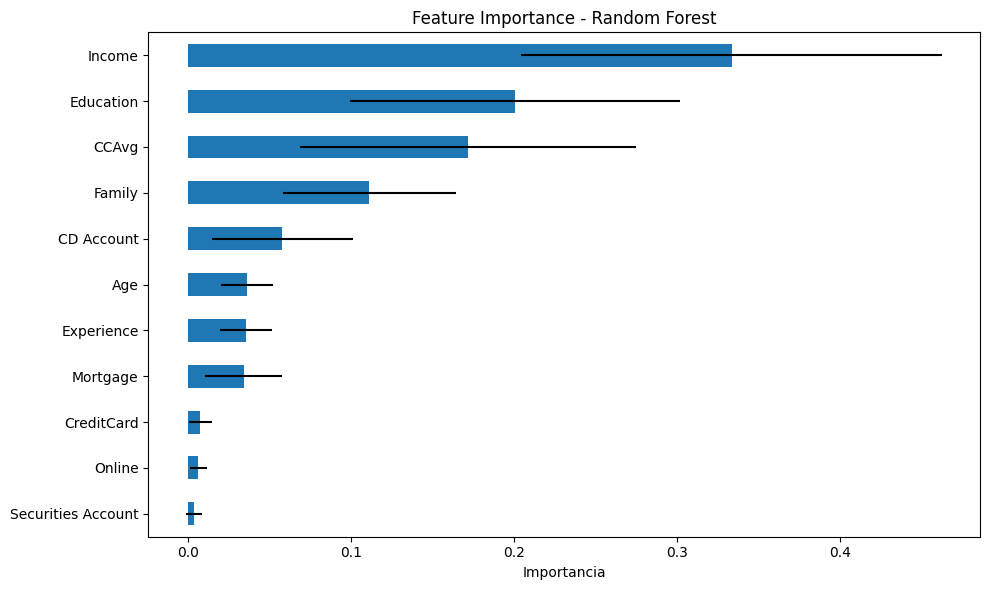

In [34]:
print("\n" + "="*70)
print("IMPORTANCIA DE CARACTERÍSTICAS (Feature Importance)")
print("="*70)

# Calcular importancia de características
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Crear DataFrame
importance_df = pd.DataFrame({
    'feature': train_X.columns, 
    'importance': importances, 
    'std': std
})
importance_df = importance_df.sort_values('importance', ascending=True)

print("\n📊 Importancia de características:")
print(importance_df.to_string(index=False))

# Plotear
print("\nGenerando gráfico de importancia...")
ax = importance_df.plot(kind='barh', xerr='std', x='feature', legend=False, figsize=(10, 6))
ax.set_xlabel('Importancia')
ax.set_ylabel('')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


## 13. Evaluación de Random Forest


In [35]:
print("\n" + "="*70)
print("EVALUACIÓN DE RANDOM FOREST")
print("="*70)

# Evaluación en VALIDATION SET
print("\n🎯 VALIDATION SET:")
classificationSummary(valid_y, rf.predict(valid_X))



EVALUACIÓN DE RANDOM FOREST

🎯 VALIDATION SET:
Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


---

## 14. Resumen Comparativo


In [36]:
print("\n" + "="*70)
print("COMPARACIÓN: ÁRBOL COMPLETO vs ÁRBOL OPTIMIZADO vs RANDOM FOREST")
print("="*70)

print("\n📊 RESUMEN DE MODELOS:")
print("\n1. ÁRBOL COMPLETO (Full Tree)")
print("   - Sin restricciones")
print("   - Propenso a overfitting")
print("   - Alta precisión en training, baja en validation")

print("\n2. ÁRBOL OPTIMIZADO (Best Tree - GridSearchCV)")
print("   - Con restricciones optimizadas")
print("   - Balance entre precisión y generalización")
print("   - Mejor rendimiento en validation")

print("\n3. RANDOM FOREST")
print("   - Conjunto de 500 árboles")
print("   - Mayor robustez")
print("   - Generalmente mejor rendimiento")
print("   - Más lento de entrenar pero más rápido de predecir")

print("\n✅ Notebook completado exitosamente!")



COMPARACIÓN: ÁRBOL COMPLETO vs ÁRBOL OPTIMIZADO vs RANDOM FOREST

📊 RESUMEN DE MODELOS:

1. ÁRBOL COMPLETO (Full Tree)
   - Sin restricciones
   - Propenso a overfitting
   - Alta precisión en training, baja en validation

2. ÁRBOL OPTIMIZADO (Best Tree - GridSearchCV)
   - Con restricciones optimizadas
   - Balance entre precisión y generalización
   - Mejor rendimiento en validation

3. RANDOM FOREST
   - Conjunto de 500 árboles
   - Mayor robustez
   - Generalmente mejor rendimiento
   - Más lento de entrenar pero más rápido de predecir

✅ Notebook completado exitosamente!
